#Analisis de datos de Eco Bici CDMX

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

## Extracción de datos

Obtenemos los datos desde la página web de EcoBici

In [3]:
url = "https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/02/2025-01.csv"

csv_fil_name = "ecoBici_2025-01"


In [4]:
print(f"Descargado datos desde: {url}")
try:
  response = requests.get(url)
  response.raise_for_status()
  print("Descarga completada con exito")

except requests.exceptions.Timeout as e:
  print(f"Error de timeout durante la descarga: {e}")
  df_raw = pd.DataFrame()

except requests.exceptios.RequestException as e:
  print(f"Error durante la descarga: {e}")
  df_raw = pd.DataFrame()

Descargado datos desde: https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/02/2025-01.csv
Descarga completada con exito


In [5]:
with open(csv_fil_name, 'wb') as f:
  f.write(response.content)
  print(f"Archivo zip guardado como: {csv_fil_name}")

  print(f"Leyedo datos desde: {csv_fil_name}")
  df_raw = pd.read_csv(csv_fil_name)
  print("Extracción completa con exito")

Archivo zip guardado como: ecoBici_2025-01
Leyedo datos desde: ecoBici_2025-01
Extracción completa con exito


Muestra de los datos obtenidos

In [6]:
print("Tamaño del DataFrame:")
print(df_raw.shape)

print("\nPrevisualización del DataFrame:")
display(df_raw.head(50))

Tamaño del DataFrame:
(1809775, 9)

Previsualización del DataFrame:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17
5,M,24.0,7579436,222,31/12/2024,23:34:33,483,01/01/2025,00:01:58
6,M,31.0,7161920,034,31/12/2024,23:25:47,688,01/01/2025,00:02:16
7,M,22.0,7220593,254,31/12/2024,23:50:20,539,01/01/2025,00:02:41
8,M,29.0,4031258,560,31/12/2024,23:52:11,120,01/01/2025,00:03:28
9,F,24.0,6463376,560,31/12/2024,23:51:50,120,01/01/2025,00:03:31


## Limpieza de datos

Se busca obtener una mejora en los modelos. Este es uno de los procesos más importantes.

Librerias principales para la limpieza:
* Pandas -> Data manipulation, filtering, joins, reshaping
* Numpy -> Numerical computation and vertical something
* Scikit-learn

Estrategias:
* Eliminar columnas con MUCHOS datos vacios
* Imputar los datos faltantes con la media (promedio) o la mediana (valor de en medio)
* Convertir los valores vacios en "default" -> 0
* Usar modelos predictivos

In [7]:
print("\nTipos de datos antes de la conversación a datetime")
print(df_raw.dtypes)


Tipos de datos antes de la conversación a datetime
Genero_Usuario            object
Edad_Usuario             float64
Bici                       int64
Ciclo_Estacion_Retiro     object
Fecha_Retiro              object
Hora_Retiro               object
Ciclo_EstacionArribo      object
Fecha_Arribo              object
Hora_Arribo               object
dtype: object


In [17]:
df_raw.isnull().sum()

,0
Genero_Usuario,1
Edad_Usuario,147
Bici,0
Ciclo_Estacion_Retiro,0
Fecha_Retiro,0
Hora_Retiro,0
Ciclo_EstacionArribo,0
Fecha_Arribo,0
Hora_Arribo,0


In [15]:
print(f"Edades nulas: {df_raw['Edad_Usuario'].isnull().sum()}")
print(f"Edades no nulas: {df_raw['Edad_Usuario'].notnull().sum()}")

Edades nulas: 147
Edades no nulas: 1809628


In [18]:
# Ponemos la mediana en las edades faltantes para no generar outliers
df_raw['Edad_Usuario'] = df_raw['Edad_Usuario'].fillna(df_raw['Edad_Usuario'].median())

In [19]:
df_raw.isnull().sum()

,0
Genero_Usuario,1
Edad_Usuario,0
Bici,0
Ciclo_Estacion_Retiro,0
Fecha_Retiro,0
Hora_Retiro,0
Ciclo_EstacionArribo,0
Fecha_Arribo,0
Hora_Arribo,0


In [23]:
df_raw['Edad_Usuario'] = df_raw['Edad_Usuario'].astype(int)

# Ejercicio: media, mediana y moda (25 de agosto de 2025)

Calcular las medias de tendencia central de todas las columnas que aplique

In [39]:
print(f"Media de la edad: {df_raw['Edad_Usuario'].mean(): .2f}")
print(f"Mediana de la edad: {df_raw['Edad_Usuario'].median()}")
print(f"Moda de la edad: {df_raw['Edad_Usuario'].mode()}")

Media de la edad:  34.00
Mediana de la edad: 32.0
Moda de la edad: 0    30
Name: Edad_Usuario, dtype: int64


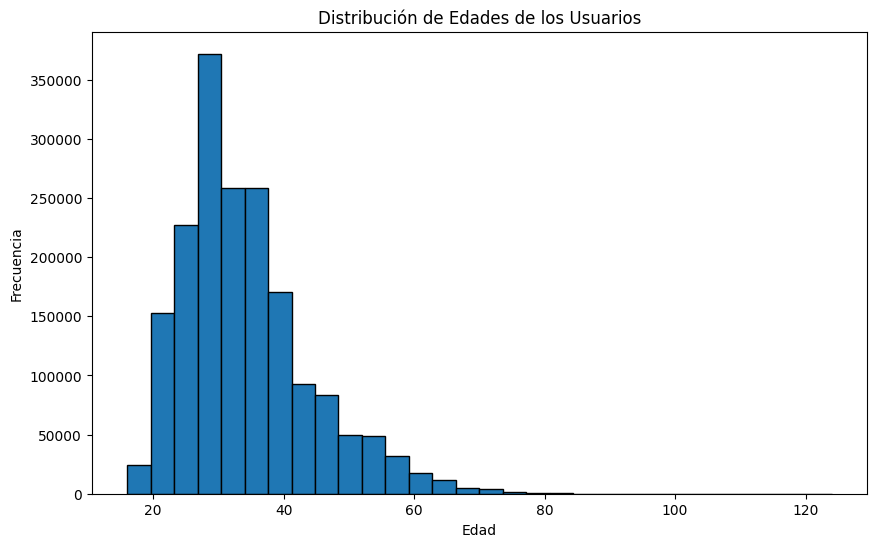

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df_raw['Edad_Usuario'], bins=30, edgecolor='black')
plt.title('Distribución de Edades de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()